# Backpropagation Algorithm for Multiple Classes

# Wine Quality Dataset

Wine Quality Dataset contains of 720 samples, 11 features and 1 column for 4 quality class labels. Class labels are defined as 0, 1, 2 and 3.

In [13]:
import pandas as pd
import numpy as np
import math

data = pd.read_csv("wine_quality_white_modified.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class
0,0.478873,0.236364,0.253012,0.025836,0.141618,0.141869,0.277273,0.955745,0.908377,0.444444,0.739437,3
1,0.366197,0.140909,0.198795,0.024316,0.080925,0.044983,0.134091,0.952617,0.863874,0.777778,0.838028,3
2,0.556338,0.463636,0.204819,0.039514,0.141618,0.044983,0.306818,0.956082,0.808901,0.472222,0.704225,1
3,0.450704,0.254545,0.246988,0.103343,0.130058,0.211073,0.490909,0.957863,0.808901,0.425926,0.661972,1
4,0.485915,0.136364,0.168675,0.066869,0.083815,0.048443,0.243182,0.956197,0.848168,0.425926,0.732394,3


In [14]:
df2 = data.copy()
df2.drop('quality_class', axis=1, inplace=True)
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.478873,0.236364,0.253012,0.025836,0.141618,0.141869,0.277273,0.955745,0.908377,0.444444,0.739437
1,0.366197,0.140909,0.198795,0.024316,0.080925,0.044983,0.134091,0.952617,0.863874,0.777778,0.838028
2,0.556338,0.463636,0.204819,0.039514,0.141618,0.044983,0.306818,0.956082,0.808901,0.472222,0.704225
3,0.450704,0.254545,0.246988,0.103343,0.130058,0.211073,0.490909,0.957863,0.808901,0.425926,0.661972
4,0.485915,0.136364,0.168675,0.066869,0.083815,0.048443,0.243182,0.956197,0.848168,0.425926,0.732394


# Data Processing

fixed acidity           0.070423
volatile acidity        0.110227
citric acid             0.066265
residual sugar          0.103343
chlorides               0.043353
free sulfur dioxide     0.076125
total sulfur dioxide    0.131818
density                 0.003970
pH                      0.057592
sulphates               0.159722
alcohol                 0.154930
quality_class           1.500000
dtype: float64
(570, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class
0,0.478873,0.236364,0.253012,0.025836,0.141618,0.141869,0.277273,0.955745,0.908377,0.444444,0.739437,3
1,0.556338,0.463636,0.204819,0.039514,0.141618,0.044983,0.306818,0.956082,0.808901,0.472222,0.704225,1
2,0.450704,0.254545,0.246988,0.103343,0.130058,0.211073,0.490909,0.957863,0.808901,0.425926,0.661972,1
3,0.485915,0.136364,0.168675,0.066869,0.083815,0.048443,0.243182,0.956197,0.848168,0.425926,0.732394,3
4,0.507042,0.218182,0.204819,0.016717,0.130058,0.010381,0.145455,0.954109,0.845550,0.472222,0.802817,1


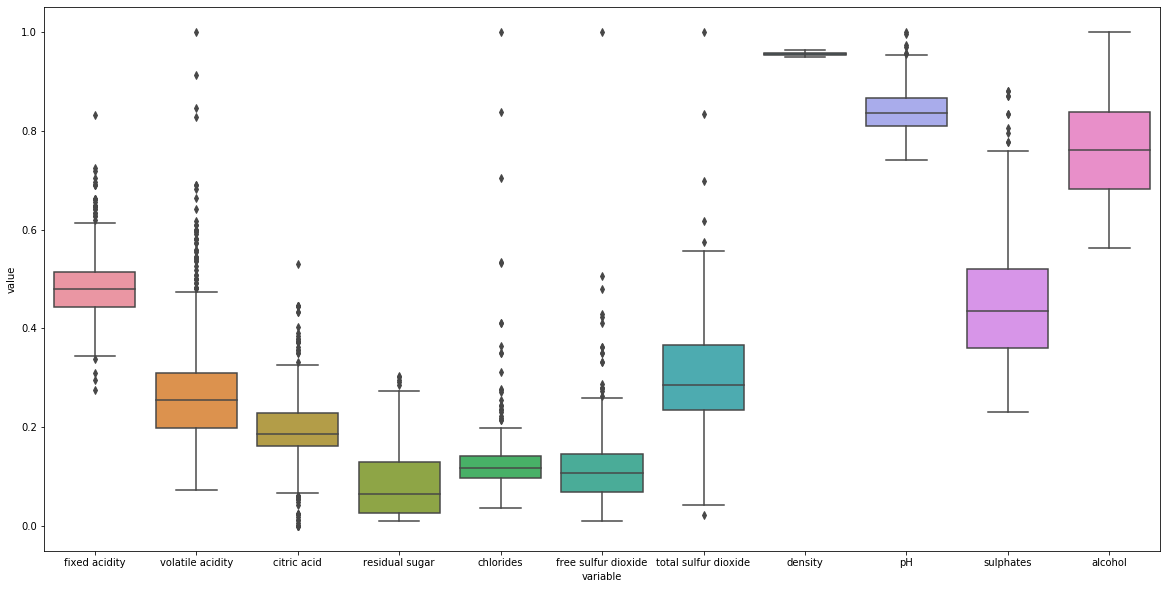

In [16]:
#detecting and removing outliers
import seaborn as sns
import matplotlib.pyplot as plt

fig_size = (20, 10)
fig, ax = plt.subplots(figsize = fig_size)
sns.boxplot(x="variable", y="value", data=pd.melt(df2), ax=ax)

#IQR Score
quantile1 = data.quantile(0.25)
quantile3 = data.quantile(0.75)
IQR = quantile3 - quantile1

print(IQR)

#removing outliers
data = data[~((data < (quantile1 - 1.5 * IQR)) |(data > (quantile3 + 1.5 * IQR))).any(axis=1)]

print(data.shape)
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)
data.head()

In [17]:
print("Classes: ", data['quality_class'].unique())

class_0_count = 0
class_1_count = 0
class_2_count = 0
class_3_count = 0

R = []
X = []

for i in range(0, len(data)):
    if(data['quality_class'][i] == 0): 
        R.append([1, 0, 0, 0])
        class_0_count = class_0_count + 1
    elif(data['quality_class'][i] == 1): 
        R.append([0, 1, 0, 0])    
        class_1_count = class_1_count + 1
    elif(data['quality_class'][i] == 2): 
        R.append([0, 0, 1, 0])
        class_2_count = class_2_count + 1
    elif(data['quality_class'][i] == 3): 
        R.append([0, 0, 0, 1])        
        class_3_count = class_3_count + 1
    
    X.append([data['fixed acidity'][i], data['volatile acidity'][i], data['citric acid'][i], data['residual sugar'][i], data['chlorides'][i], data['free sulfur dioxide'][i], data['total sulfur dioxide'][i], data['density'][i], data['pH'][i], data['sulphates'][i], data['alcohol'][i]])    

print("Class-0 Record Count: ", class_0_count)
print("Class-1 Record Count: ", class_1_count)
print("Class-2 Record Count: ", class_2_count)
print("Class-3 Record Count: ", class_3_count)

N = len(X)
X = np.c_[np.ones(N), X]             #Adding Ones to the X as first bias input
X = np.array(X)
R = np.array(R)

#data normalization
#for i in range(0, len(X)):              #row
#    for j in range(1, len(X[0]) - 1):   #column
#        X[i, j] = round((X[i, j] - min(X[:, j])) / (max(X[:, j]) - min(X[:, j])), 9)    # x' = (x - min(x)) / (max(x) - min(x))       

#data standardization
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

print("X: ", X)
print("R: ", R)

Classes:  [3 1 0 2]
Class-0 Record Count:  98
Class-1 Record Count:  147
Class-2 Record Count:  169
Class-3 Record Count:  156
X:  [[ 0.         -0.02905208 -0.14262312 ...  1.83330482 -0.03772282
  -0.37234207]
 [ 0.          1.46403379  2.87725703 ... -0.73156938  0.21724168
  -0.76115528]
 [ 0.         -0.57199239  0.09896731 ... -0.73156938 -0.20769915
  -1.22773113]
 ...
 [ 0.          0.24241808 -0.62580393 ... -0.93405947 -1.22755716
   1.18291074]
 [ 0.          0.37815317 -0.38421352 ... -0.25909255 -0.20769915
   0.17199641]
 [ 0.         -0.30052223  0.82373853 ...  0.68586111  0.04726535
  -0.68339264]]
R:  [[0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 ...
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]]


# MLP Backpropagation algorithm

In [19]:
def tanh(xx):
    return 2 / (1 + math.exp(-2 * xx))
    
def mlp_back_prop(x, r, H, K, D, n, epochs, desired_accuracy, alpha, beta):
    np.random.seed(100)        
    w = np.random.uniform(-0.01, 0.01, (D + 1, H))                                                                #initialize all vih and whj to rand (-0.01, 0.01)
    v = np.random.uniform(-0.01, 0.01, (H + 1, K))
    error = []
    prev_errors = []    

    for epoch in range(epochs):
        output = []
        accuracy = 0
                
        d_w = np.zeros((D + 1, H))
        d_v = np.zeros((H + 1, K))
                        
        np.random.shuffle(x)
        
        for t in range(len(x)):                                                                                   #For all (xt, rt) ∈ X in random order            
            w_x = np.dot(w.T, x[t, :])
            zh = np.append(1, list(map(np.tanh, w_x)))                                                                 #For h = 1,....,H   zh = tanh(whT . xt)                                
            
            y_temp = np.dot(v.T, zh)                                                                                   #For i = 1,....,K   yi = viT . z            
            y_temp2 = [math.exp(i) for i in y_temp]
            y = [(i / sum(y_temp2)) for i in y_temp2]
            
            if(np.argmax(y) == np.argmax(r[t])):
                accuracy = accuracy + 1
                
            for i in range(K):                                                                                         #For i = 1,....,K
                d_v[:, i] = n * np.dot((r[t, i] - y[i]), zh)                                                                #delta_vi = eta(rit - yit) . z
            
            for h in range(H):                                                                                         #For h = 1,....,H
                d_w[:, h] = n * np.dot((r[t, ] - y), v[h + 1, :]) * zh[h + 1] * (1 - zh[h + 1]) * X[t, :]         #delta_wh = eta(SUMi(rit - yit) * vih) * zh * (1 - zh) * xt                                
                
            v = v + d_v                                                                                                #For i = 1,....,K   vi = vi + delta_vi
            w = w + d_w                                                                                                #For h = 1,....,H   wh = wh + delta_wh
            
            output.append(y)
        
        error.append(1 - (accuracy / len(x)))
                
        ############ Adaptive learning ###############
        
        if(epoch >= 1):
            if(error[epoch] < np.average(prev_errors)):      #comparing with average of last 3 errors
                n = n + alpha
            else:
                n = n - (beta * n)
                
            if len(prev_errors) > 3:
                prev_errors.pop(0)
               
        prev_errors.append(error[epoch])
        ##############################################
        
        if(accuracy / len(x) >= desired_accuracy):
            print("Achieved Accuracy: ", round(accuracy / len(x) * 100, 2))
            print("Desired Accuracy: ", round(desired_accuracy * 100, 2))
            return (v, w)
        else: 
            print("EPOCH: {}".format(epoch + 1), "   Accuracy: {}".format(round(accuracy / len(x) * 100, 2)))

    print("Achieved Accuracy: ", round(accuracy / len(x) * 100, 2))
    print("Desired Accuracy: ", round(desired_accuracy * 100, 2))
        
    return(v, w, error)

## Different configurations No. 1 obtained using number of hidden units = 4000 and initial learning rate = 0.0005

In [20]:
#Hyper-parameters
N = len(X) #number of samples
K = len(data['quality_class'].unique())  #number of classes
D = len(X[0, :]) - 1  #dimension or number of independent variables
H = 4000 #size of hidden layer
eta = 0.0005 #eta
iterations = 40
accuracy_threshold = 0.95
alpha = 0.001
beta = 0.9

#returns/prints accuracy per epoch, accuracy achieved, desired accuracy, V matrix, W matrix, Error matrix
mlp_back_prop(X, R, H, K, D, eta, iterations, accuracy_threshold, alpha, beta)

EPOCH: 1    Accuracy: 29.47
EPOCH: 2    Accuracy: 30.0
EPOCH: 3    Accuracy: 29.12
EPOCH: 4    Accuracy: 29.82
EPOCH: 5    Accuracy: 29.65
EPOCH: 6    Accuracy: 29.47
EPOCH: 7    Accuracy: 28.77
EPOCH: 8    Accuracy: 30.18
EPOCH: 9    Accuracy: 29.12
EPOCH: 10    Accuracy: 29.65
EPOCH: 11    Accuracy: 29.65
EPOCH: 12    Accuracy: 29.65
EPOCH: 13    Accuracy: 29.65
EPOCH: 14    Accuracy: 29.65
EPOCH: 15    Accuracy: 29.65
EPOCH: 16    Accuracy: 29.65
EPOCH: 17    Accuracy: 29.65
EPOCH: 18    Accuracy: 29.65
EPOCH: 19    Accuracy: 29.65
EPOCH: 20    Accuracy: 29.65
EPOCH: 21    Accuracy: 29.65
EPOCH: 22    Accuracy: 29.65
EPOCH: 23    Accuracy: 29.65
EPOCH: 24    Accuracy: 29.65
EPOCH: 25    Accuracy: 29.65
EPOCH: 26    Accuracy: 29.65
EPOCH: 27    Accuracy: 29.65
EPOCH: 28    Accuracy: 29.65
EPOCH: 29    Accuracy: 29.65
EPOCH: 30    Accuracy: 29.65
EPOCH: 31    Accuracy: 29.65
EPOCH: 32    Accuracy: 29.65
EPOCH: 33    Accuracy: 29.65
EPOCH: 34    Accuracy: 29.65
EPOCH: 35    Accuracy: 2

(array([[-2.70058495e-01,  3.74971601e-02,  1.51368139e-01,
          8.99354542e-02],
        [ 7.94290760e-03,  4.58337022e-03, -9.10304576e-03,
          5.84260967e-03],
        [ 6.88481362e-03,  9.61312356e-03,  5.52628276e-03,
         -2.52846837e-03],
        ...,
        [ 5.19636825e-03,  2.42318730e-03, -3.09661794e-05,
         -3.19534966e-03],
        [-5.79412508e-03, -6.57609094e-03, -5.68454289e-03,
          8.88890468e-03],
        [-2.28908205e-04,  4.49727834e-03, -3.44731648e-03,
         -6.39497383e-03]]),
 array([[ 8.68098836e-04, -4.43261230e-03, -1.50964819e-03, ...,
          5.86577655e-03, -3.03361889e-03,  9.32333944e-03],
        [ 5.34223531e-03, -9.12331171e-03, -6.17343244e-03, ...,
          5.22064507e-03,  9.68449957e-04, -1.19029419e-05],
        [-7.87709261e-03, -9.91078620e-03,  2.54990074e-03, ...,
         -8.67186677e-03, -5.65045564e-03,  7.94791688e-03],
        ...,
        [-6.67490793e-03, -5.86784472e-03, -1.29385397e-03, ...,
       

## Different configurations No. 2 obtained using number of hidden units = 3500 and initial learning rate = 0.0001

In [ ]:
#Hyper-parameters
H = 3500 #size of hidden layer
eta = 0.0001 #eta

#returns/prints accuracy per epoch, accuracy achieved, desired accuracy, V matrix, W matrix, Error matrix
mlp_back_prop(X, R, H, K, D, eta, iterations, accuracy_threshold, alpha, beta)

EPOCH: 1    Accuracy: 24.91
EPOCH: 2    Accuracy: 26.32
EPOCH: 3    Accuracy: 29.3
EPOCH: 4    Accuracy: 29.47
EPOCH: 5    Accuracy: 29.3
EPOCH: 6    Accuracy: 30.53
EPOCH: 7    Accuracy: 29.12
EPOCH: 8    Accuracy: 29.65
EPOCH: 9    Accuracy: 27.02
EPOCH: 10    Accuracy: 27.37
EPOCH: 11    Accuracy: 31.75
EPOCH: 12    Accuracy: 28.42
EPOCH: 13    Accuracy: 28.42
EPOCH: 14    Accuracy: 31.23
EPOCH: 15    Accuracy: 29.12
EPOCH: 16    Accuracy: 30.53
EPOCH: 17    Accuracy: 28.25
EPOCH: 18    Accuracy: 29.82
EPOCH: 19    Accuracy: 26.67
EPOCH: 20    Accuracy: 31.23
EPOCH: 21    Accuracy: 28.25
EPOCH: 22    Accuracy: 29.82
EPOCH: 23    Accuracy: 28.6
EPOCH: 24    Accuracy: 29.47
EPOCH: 25    Accuracy: 28.07
EPOCH: 26    Accuracy: 30.35
EPOCH: 27    Accuracy: 27.37
EPOCH: 28    Accuracy: 30.0
EPOCH: 29    Accuracy: 29.82
EPOCH: 30    Accuracy: 29.3
EPOCH: 31    Accuracy: 27.37
EPOCH: 32    Accuracy: 28.6
EPOCH: 33    Accuracy: 29.82
EPOCH: 34    Accuracy: 28.25
EPOCH: 35    Accuracy: 29.47


## Different configurations No. 3 obtained using number of hidden units = 3000 and initial learning rate = 0.001

In [ ]:
#Hyper-parameters
H = 3000 #size of hidden layer
eta = 0.001 #eta

#returns/prints accuracy per epoch, accuracy achieved, desired accuracy, V matrix, W matrix, Error matrix
mlp_back_prop(X, R, H, K, D, eta, iterations, accuracy_threshold, alpha, beta)

## Different configurations No. 3 obtained using number of hidden units = 2000 and initial learning rate = 0.01

In [ ]:
#Hyper-parameters
H = 2000 #size of hidden layer
eta = 0.01 #eta

#returns/prints accuracy per epoch, accuracy achieved, desired accuracy, V matrix, W matrix, Error matrix
mlp_back_prop(X, R, H, K, D, eta, iterations, accuracy_threshold, alpha, beta)

## Different configurations No. 5 obtained using number of hidden units = 1000 and initial learning rate = 0.1

In [ ]:
#Hyper-parameters
H = 1000 #size of hidden layer
eta = 0.1 #eta

#returns/prints accuracy per epoch, accuracy achieved, desired accuracy, V matrix, W matrix, Error matrix
mlp_back_prop(X, R, H, K, D, eta, iterations, accuracy_threshold, alpha, beta)

# Cross Validation

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
import math

print("Classes: ", data['quality_class'].unique())

class_0_count = 0
class_1_count = 0
class_2_count = 0
class_3_count = 0

R = []
X = []

for i in range(0, len(data)):
    if(data['quality_class'][i] == 0): 
        R.append([1, 0, 0, 0])
        class_0_count = class_0_count + 1
    elif(data['quality_class'][i] == 1): 
        R.append([0, 1, 0, 0])    
        class_1_count = class_1_count + 1
    elif(data['quality_class'][i] == 2): 
        R.append([0, 0, 1, 0])
        class_2_count = class_2_count + 1
    elif(data['quality_class'][i] == 3): 
        R.append([0, 0, 0, 1])        
        class_3_count = class_3_count + 1
    
    X.append([data['fixed acidity'][i], data['volatile acidity'][i], data['citric acid'][i], data['residual sugar'][i], data['chlorides'][i], data['free sulfur dioxide'][i], data['total sulfur dioxide'][i], data['density'][i], data['pH'][i], data['sulphates'][i], data['alcohol'][i]])    

print("Class-0 Record Count: ", class_0_count)
print("Class-1 Record Count: ", class_1_count)
print("Class-2 Record Count: ", class_2_count)
print("Class-3 Record Count: ", class_3_count)

N = len(X)
X = np.c_[np.ones(N), X]             #Adding Ones to the X as first bias input
X = np.array(X)
R = np.array(R)            

#data standardization
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_test = X[0:400, :]
Y_test = R[0:400, :]

print(X_test.shape)


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(400), solver='adam', learning_rate_init=0.0005, learning_rate='adaptive', activation='relu', max_iter=1000, random_state=42)
scores = cross_validate(mlp.fit(X, R), np.array(X), np.array(R))

print(scores)

pred = mlp.predict(X_test)

print('Accuracy: {}'.format(round(accuracy_score(np.array(Y_test), np.array(pred)) * 100, 2)))

classes = ['Class-0', 'Class-1', 'Class-2', 'Class-3']
print(classification_report(np.array(Y_test), np.array(pred), target_names=classes))

## Different config to get better performance: performance increased by increasing number neurons in hidden layer

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(500), solver='adam', learning_rate_init=0.0005, learning_rate='adaptive', activation='relu', max_iter=1000, random_state=42)
scores = cross_validate(mlp.fit(X, R), np.array(X), np.array(R))

print(scores)

pred = mlp.predict(X_test)

print('Accuracy: {}'.format(round(accuracy_score(np.array(Y_test), np.array(pred)) * 100, 2)))

classes = ['Class-0', 'Class-1', 'Class-2', 'Class-3']
print(classification_report(np.array(Y_test), np.array(pred), target_names=classes))

# 80/20 Train Test Split

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Classes: ", data['quality_class'].unique())

R = []
X = []

for i in range(0, len(data)):
    if(data['quality_class'][i] == 0): R.append([1, 0, 0, 0])
    elif(data['quality_class'][i] == 1): R.append([0, 1, 0, 0])    
    elif(data['quality_class'][i] == 2): R.append([0, 0, 1, 0])
    elif(data['quality_class'][i] == 3): R.append([0, 0, 0, 1])        
    
    X.append([data['fixed acidity'][i], data['volatile acidity'][i], data['citric acid'][i], data['residual sugar'][i], data['chlorides'][i], data['free sulfur dioxide'][i], data['total sulfur dioxide'][i], data['density'][i], data['pH'][i], data['sulphates'][i], data['alcohol'][i]])    

N = len(X)
X = np.c_[np.ones(N), X]             #Adding Ones to the X as first bias input
X = np.array(X)
R = np.array(R)
       
print("X: ", X)
print("R: ", R)

X_train, X_test, Y_train, Y_test = train_test_split(X, R, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('Train Dataset: ', X_train.shape)
print('Test Dataset: ', X_test.shape)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(600), solver='adam', learning_rate_init=0.0005, learning_rate='adaptive', activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, Y_train)

In [ ]:
pred = mlp.predict(X_test)

print('Accuracy: {}'.format(round(accuracy_score(np.array(Y_test), np.array(pred)) * 100, 2)))

classes = ['Class-0', 'Class-1', 'Class-2', 'Class-3']
print(classification_report(np.array(Y_test), np.array(pred), target_names=classes))

# Different config to get better performance: performance increased by increasing number of neurons in the hidden layer and initial learning rate

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(800), solver='adam', learning_rate_init=0.001, learning_rate='adaptive', activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, Y_train)

pred = mlp.predict(X_test)

print('Accuracy: {}'.format(round(accuracy_score(np.array(Y_test), np.array(pred)) * 100, 2)))

classes = ['Class-0', 'Class-1', 'Class-2', 'Class-3']
print(classification_report(np.array(Y_test), np.array(pred), target_names=classes))